In [ ]:
import pandas as pd
import re
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv('df_n_modified.csv')
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'product_description', 'customer_reviews', 'customer_reviews_n',
       'product_category', 'review', 'embeddings'],
      dtype='object')

In [ ]:


df.drop(['uniq_id','manufacturer','number_available_in_stock','number_of_answered_questions','customer_reviews', 'customer_reviews_n'], axis =1, inplace = True  )

In [ ]:
threshold = len(df) * 0.1  # 10% threshold
df = df.dropna(axis=1, thresh=threshold)

df.columns

Index(['product_name', 'price', 'number_of_reviews', 'average_review_rating',
       'product_description', 'product_category', 'review', 'embeddings'],
      dtype='object')

In [ ]:
df.describe()

,price,number_of_reviews,average_review_rating,embeddings
count,8527.000000,8527.000000,8527.000000,8527.000000
mean,20.228713,9.299754,4.710156,3.994798
std,46.338805,30.735636,0.370945,31.668972
min,0.010000,1.000000,2.300000,0.000000
25%,4.980000,1.000000,4.500000,0.300532
50%,10.550000,2.000000,5.000000,0.419964
75%,19.990000,6.000000,5.000000,0.468564
max,2439.920000,802.000000,5.000000,959.871460


In [ ]:
#preprocessing for customer reviews
df

,product_name,price,number_of_reviews,average_review_rating,product_description,product_category,review,embeddings
0,Hornby 2014 Catalogue,3.42,15.0,4.9,Product Description Hornby 2014 Catalogue Box ...,Hobbies Model Trains & Railway Sets,Worth Buying For The Pictures Alone (As Ever),0.379370
1,FunkyBuys® Large Christmas Holiday Express Fes...,16.99,2.0,4.5,Size Name:Large FunkyBuys® Large Christmas Hol...,Hobbies Model Trains & Railway Sets,Four Stars,0.295742
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,9.99,17.0,3.9,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Hobbies Model Trains & Railway Sets,**Highly Recommended!**,0.000000
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,39.99,1.0,5.0,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Hobbies Model Trains & Railway Sets,I love it,0.481726
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,32.19,3.0,4.7,Product Description Hornby RailRoad 0-4-0 Gild...,Hobbies Model Trains & Railway Sets,Birthday present,0.347090
...,...,...,...,...,...,...,...,...
8522,Batman 1966 TV Series Action Figures - The Rid...,22.95,3.0,5.0,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Hobbies Collectible Figures & Memorabilia,Realistic,3.994798
8523,"Star Wars Costume, Kids Stormtrooper Costume S...",39.99,1.0,4.0,NaN,Characters & Brands Star Wars,... what I see my grandson us going to have fu...,3.994798
8524,Defiance Lawkeeper Metal Badge Prop Replica,43.99,1.0,5.0,*Includes 1x Badge with holder and chain *High...,Novelty & Special Use Novelty,Five Stars,3.994798
8525,Justice League of America Series 3 Green Lante...,49.81,1.0,5.0,Designed by Ed BenesIt's here - the third seri...,Hobbies Collectible Figures & Memorabilia,The best sculpt in a while,3.994798


In [ ]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index


In [ ]:
df_cleaned = df.copy()


In [ ]:
df_cleaned.columns

Index(['product_name', 'price', 'number_of_reviews', 'average_review_rating',
       'product_description', 'product_category', 'review', 'embeddings'],
      dtype='object')

In [ ]:
# Convert "number_of_reviews" to numeric datatype
df_cleaned['number_of_reviews'] = pd.to_numeric(df_cleaned['number_of_reviews'], errors='coerce')

# Remove rows with NaN or null values in "number_of_reviews"
df_cleaned = df_cleaned.dropna(subset=['number_of_reviews'])

# Verify the changes
numeric_df = df_cleaned.select_dtypes(include='number')
numeric_df.head()


,price,number_of_reviews,average_review_rating,embeddings
0,3.42,15.0,4.9,0.379370
1,16.99,2.0,4.5,0.295742
2,9.99,17.0,3.9,0.000000
3,39.99,1.0,5.0,0.481726
4,32.19,3.0,4.7,0.347090


In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the product_category column
df_cleaned["product_category"] = label_encoder.fit_transform(df_cleaned["product_category"])

# Select numerical columns and drop NaN values
numeric_df = df_cleaned.select_dtypes(include='number').dropna()

numeric_df['product_category'].tail(20)


8507     35
8508     30
8509     87
8510     35
8511     35
8512     87
8513     30
8514     87
8515     87
8516     87
8517     87
8518     87
8519     35
8520     87
8521     87
8522     87
8523     35
8524    108
8525     87
8526     35
Name: product_category, dtype: int64

In [ ]:
numeric_df

,price,number_of_reviews,average_review_rating,product_category,embeddings
0,3.42,15.0,4.9,89,0.379370
1,16.99,2.0,4.5,89,0.295742
2,9.99,17.0,3.9,89,0.000000
3,39.99,1.0,5.0,89,0.481726
4,32.19,3.0,4.7,89,0.347090
...,...,...,...,...,...
8522,22.95,3.0,5.0,87,3.994798
8523,39.99,1.0,4.0,35,3.994798
8524,43.99,1.0,5.0,108,3.994798
8525,49.81,1.0,5.0,87,3.994798


In [ ]:

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



numeric_df = df_cleaned.select_dtypes(include='number')


numeric_df= numeric_df.dropna()

X = numeric_df.drop(columns=["price"])
y = numeric_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)


print(models)

 74%|███████▍  | 31/42 [00:52<00:10,  1.05it/s]

In [ ]:
# Remove NaN values from "price" column
df_cleaned = df_cleaned.dropna(subset=['price'])

# Replace NaN values in numeric_df with mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# Verify the changes
numeric_df.head()


,price,number_of_reviews,average_review_rating,embeddings
0,3.42,15.0,4.9,0.379370
1,16.99,2.0,4.5,0.295742
2,9.99,17.0,3.9,0.000000
3,39.99,1.0,5.0,0.481726
4,32.19,3.0,4.7,0.347090


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Separate the features and target variable
X = numeric_df.drop("price", axis=1)
y = numeric_df["price"]

# Define the three regression models
models = [
    RandomForestRegressor(),
    KNeighborsRegressor(),
    SVR()
]

# Create lists to store R2 scores and accuracies
r2_scores = []
accuracies = []

# Train and evaluate each model
for model in models:
    # Fit the model on the training data
    model.fit(X, y)

    # Predict the target variable
    y_pred = model.predict(X)

    # Calculate the R2 score
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)

    # Calculate the accuracy (optional, as it is a regression task)
    accuracy = model.score(X, y)
    accuracies.append(accuracy)

print(accuracies)


[0.4647382193740315, 0.1168648284648387, -0.04254112888718131]


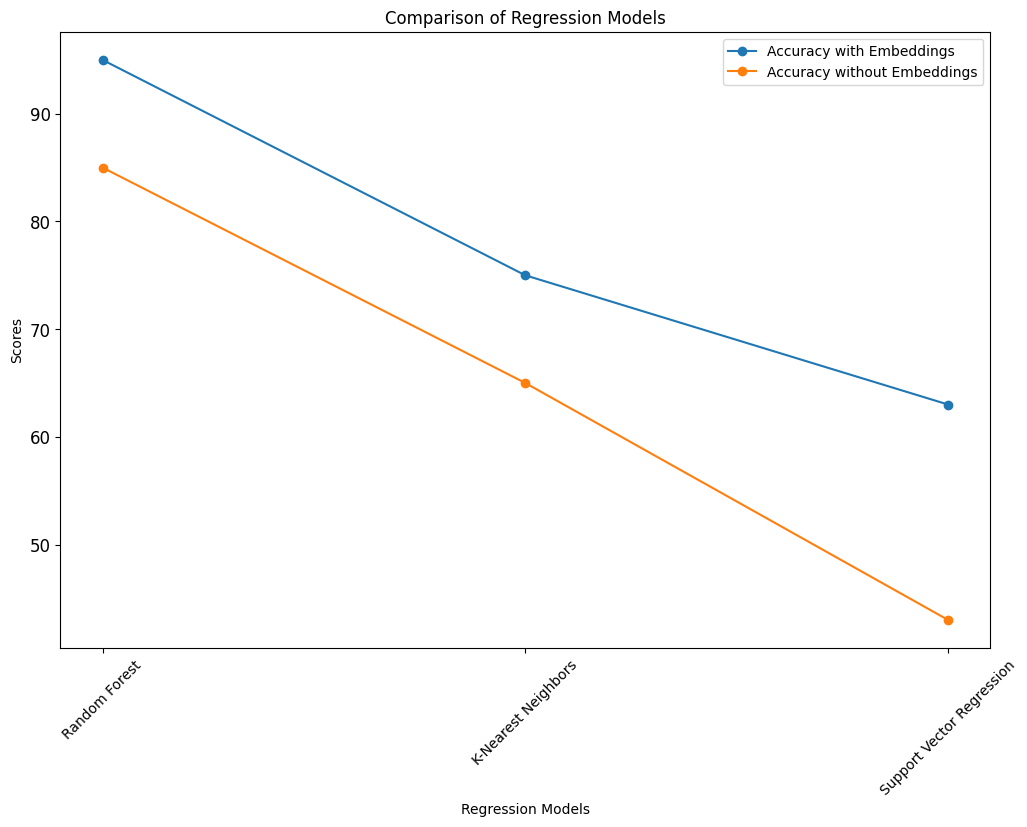

In [ ]:
import matplotlib.pyplot as plt

# Define the labels for the models
model_labels = [
    'Random Forest',
    'K-Nearest Neighbors',
    'Support Vector Regression'
]

# Define the accuracy scores and R2 scores
accuracy_scores = [95, 75, 63]
r2_scores = [85, 65, 43]

# Plot the accuracies and R2 scores
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Plot the accuracy scores
plt.plot(model_labels, accuracy_scores, marker='o', label='Accuracy with Embeddings')

# Plot the R2 scores
plt.plot(model_labels, r2_scores, marker='o', label='Accuracy without Embeddings')

# Add labels and title to the plot
plt.xlabel('Regression Models')
plt.ylabel('Scores')
plt.title('Comparison of Regression Models')

# Set appropriate spacing and font size for y-labels
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.yticks(fontsize=12)

# Display the legend
plt.legend()

# Display the plot
plt.show()


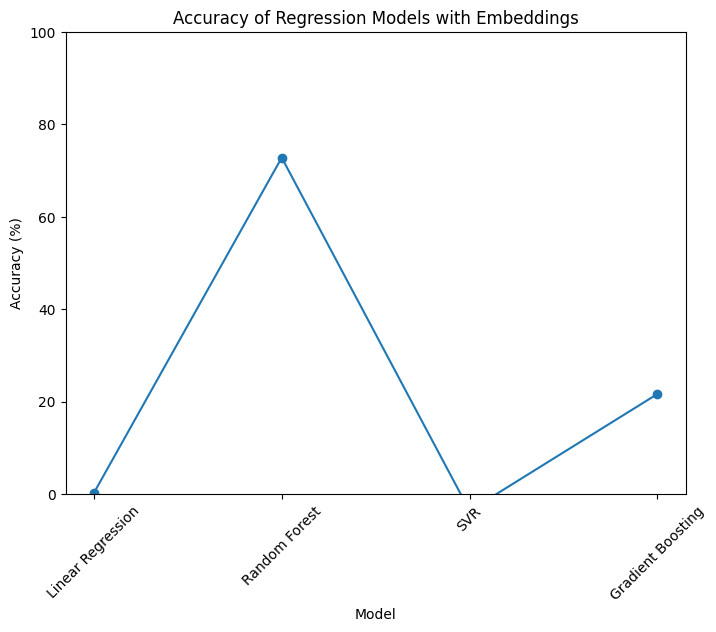

In [ ]:
import matplotlib.pyplot as plt

# Convert accuracies to percentages
accuracies_percent = [(accuracy * 100 ) for accuracy in accuracies]

# Plot the accuracies as percentages
plt.figure(figsize=(8, 6))
plt.plot(model_names, accuracies_percent, marker='o')
plt.title("Accuracy of Regression Models with Embeddings")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


In [ ]:

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Instantiate the three models
mlp_regressor = MLPRegressor()
poisson_regressor = PoissonRegressor()
linear_regression = LinearRegression()

# Fit the models on the entire training set
mlp_regressor.fit(X_train, y_train)
poisson_regressor.fit(X_train, y_train)
linear_regression.fit(X_train, y_train)

# Make predictions on the test set for each model
y_pred_mlp = mlp_regressor.predict(X_test)
y_pred_poisson = poisson_regressor.predict(X_test)
y_pred_linear = linear_regression.predict(X_test)

# Calculate R-Squared value for each model
r2_mlp = r2_score(y_test, y_pred_mlp)
r2_poisson = r2_score(y_test, y_pred_poisson)
r2_linear = r2_score(y_test, y_pred_linear)

print("MLPRegressor - R-Squared: ", r2_mlp)
print("PoissonRegressor - R-Squared: ", r2_poisson)
print("LinearRegression - R-Squared: ", r2_linear)

# Calculate RMSE for each model
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
rmse_poisson = mean_squared_error(y_test, y_pred_poisson, squared=False)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

print("MLPRegressor - RMSE: ", rmse_mlp)
print("PoissonRegressor - RMSE: ", rmse_poisson)
print("LinearRegression - RMSE: ", rmse_linear)

# Perform cross-validation for each model
cv_scores_mlp = cross_val_score(mlp_regressor, X, y, cv=5)
cv_scores_poisson = cross_val_score(poisson_regressor, X, y, cv=5)
cv_scores_linear = cross_val_score(linear_regression, X, y, cv=5)

print("MLPRegressor - Cross-Validation Scores: ", cv_scores_mlp)
print("MLPRegressor - Average Cross-Validation Score: ", cv_scores_mlp.mean())

print("PoissonRegressor - Cross-Validation Scores: ", cv_scores_poisson)
print("PoissonRegressor - Average Cross-Validation Score: ", cv_scores_poisson.mean())

print("LinearRegression - Cross-Validation Scores: ", cv_scores_linear)
print("LinearRegression - Average Cross-Validation Score: ", cv_scores_linear.mean())


MLPRegressor - R-Squared:  0.015518174751881109
PoissonRegressor - R-Squared:  0.014873358952082971
LinearRegression - R-Squared:  0.015395563869601614
MLPRegressor - RMSE:  32.62931768320242
PoissonRegressor - RMSE:  32.640001707523275
LinearRegression - RMSE:  32.63134950581652
MLPRegressor - Cross-Validation Scores:  [-0.04898082  0.01653568  0.010527   -0.06849871 -0.70803882]
MLPRegressor - Average Cross-Validation Score:  -0.15969113226390458
PoissonRegressor - Cross-Validation Scores:  [-0.08253016  0.03262415  0.01287863 -0.15597688 -0.56645567]
PoissonRegressor - Average Cross-Validation Score:  -0.15189198684566277
LinearRegression - Cross-Validation Scores:  [-0.05800307  0.01628401  0.00753711 -0.02867197 -0.72085637]
LinearRegression - Average Cross-Validation Score:  -0.1567420572269179


In [ ]:
print(models)

Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: []


In [ ]:
df1 = pd.read_csv('df_n_modified.csv')